# **Customer Subscription Prediction**

**Random Forest Machine learning model which can predict if a customer will subscribe to a term deposit product of bank**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# **Exploratory Data Analysis (EDA)**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Bse -Machine Learning/Assignment no. 4th/bank-full.csv')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
#Drop unnecessary column
df = df.drop(columns=['contact','month','poutcome'],axis=1)

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'Target'],
      dtype='object')

In [12]:
df.shape

(45211, 14)

In [13]:
#print only object data
df[df.columns[df.dtypes=='object']]

,job,marital,education,default,housing,loan,Target
0,management,married,tertiary,no,yes,no,no
1,technician,single,secondary,no,yes,no,no
2,entrepreneur,married,secondary,no,yes,yes,no
3,blue-collar,married,unknown,no,yes,no,no
4,unknown,single,unknown,no,no,no,no
...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,yes
45207,retired,divorced,primary,no,no,no,yes
45208,retired,married,secondary,no,no,no,yes
45209,blue-collar,married,secondary,no,no,no,no


In [14]:
#print only numerical data
df.select_dtypes(exclude='object')

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [15]:
df.loc[df['Target']=='yes'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0
balance,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0
day,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0
duration,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0
campaign,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0
pdays,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0
previous,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


In [16]:
df.loc[df['Target']=='no'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,39922.0,40.838986,10.172662,18.0,33.0,39.0,48.0,95.0
balance,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
day,39922.0,15.892290,8.294728,1.0,8.0,16.0,21.0,31.0
duration,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
campaign,39922.0,2.846350,3.212767,1.0,1.0,2.0,3.0,63.0
pdays,39922.0,36.421372,96.757135,-1.0,-1.0,-1.0,-1.0,871.0
previous,39922.0,0.502154,2.256771,0.0,0.0,0.0,0.0,275.0


In [17]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [18]:
print('Yes and No Targeted occurance  in the Dataset (in the term of percentage)')
(df['Target'].value_counts()/ df['Target'].value_counts().sum()) *100

Yes and No Targeted occurance  in the Dataset (in the term of percentage)


no     88.30152
yes    11.69848
Name: Target, dtype: float64

In [19]:
print('Customers count by Job categories')
df.groupby(['Target','job'])['job'].agg(['count']).sort_values(by ="Target",ascending=False)

Customers count by Job categories


count
Target job                 
yes    admin.           631
       blue-collar      708
       unemployed       202
       technician       840
       student          269
       services         369
       self-employed    187
       retired          516
       management      1301
       housemaid        109
       entrepreneur     123
       unknown           34
no     blue-collar     9024
       unknown          254
       unemployed      1101
       technician      6757
       student          669
       services        3785
       self-employed   1392
       retired         1748
       management      8157
       housemaid       1131
       entrepreneur    1364
       admin.          4540

In [20]:

print('Male and female customers ratio in bank from different countries:-\n')
print((df.groupby(['Target','job'])['job'].count()/df.groupby(['Target','job'])['job'].count().sum()) * 100)

Male and female customers ratio in bank from different countries:-

Target  job          
no      admin.           10.041804
        blue-collar      19.959744
        entrepreneur      3.016965
        housemaid         2.501604
        management       18.042069
        retired           3.866316
        self-employed     3.078897
        services          8.371856
        student           1.479728
        technician       14.945478
        unemployed        2.435248
        unknown           0.561810
yes     admin.            1.395678
        blue-collar       1.565991
        entrepreneur      0.272058
        housemaid         0.241092
        management        2.877618
        retired           1.141315
        self-employed     0.413616
        services          0.816173
        student           0.594988
        technician        1.857955
        unemployed        0.446794
        unknown           0.075203
Name: job, dtype: float64


In [21]:
 df.drop(df.index[df['job'] == 'unknown'], inplace = True)

In [22]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [23]:
print('Average balace of different job')
print(df.groupby(['Target','job'])['balance'].agg(['median']).sort_values(by ="Target",ascending=False))

Average balace of different job
                      median
Target job                  
yes    admin.          602.0
       blue-collar     566.5
       technician      712.5
       student         502.0
       services        473.0
       self-employed   814.0
       retired        1401.0
       management      925.0
       housemaid       976.0
       entrepreneur    606.0
       unemployed      815.5
no     blue-collar     376.0
       unemployed      495.0
       technician      390.0
       student         502.0
       services        323.0
       self-employed   505.5
       retired         647.0
       management      532.0
       housemaid       382.0
       entrepreneur    345.5
       admin.          383.5


In [24]:
print('\tTop 10 customers by Lowest balance\n')
df.loc[:,('job','education','age','balance','Target')].sort_values(by ="balance",ascending=True)[:10]

	Top 10 customers by Lowest balance



,job,education,age,balance,Target
12909,blue-collar,secondary,26,-8019,no
15682,management,tertiary,49,-6847,no
38736,management,tertiary,60,-4057,no
7413,management,tertiary,43,-3372,no
1896,self-employed,tertiary,57,-3313,no
32713,self-employed,tertiary,39,-3058,yes
18573,technician,tertiary,40,-2827,no
31509,management,tertiary,52,-2712,no
25119,blue-collar,primary,49,-2604,no
14434,management,tertiary,51,-2282,no


In [25]:
print('\tTop 10 customers by Highest balance\n')
df.loc[:,('job','education','age','balance','Target')].sort_values(by ="balance",ascending=False)[:10]

	Top 10 customers by Highest balance



,job,education,age,balance,Target
39989,management,tertiary,51,102127,no
26227,management,tertiary,59,98417,no
42558,retired,secondary,84,81204,yes
43393,retired,secondary,84,81204,yes
41693,retired,primary,60,71188,no
19785,management,tertiary,56,66721,no
21192,blue-collar,primary,52,66653,no
19420,admin.,unknown,59,64343,no
41374,entrepreneur,tertiary,32,59649,no
12926,blue-collar,secondary,56,58932,no


In [26]:
#statical analysis customers whose balance is below 0 or in negative 
df.loc[df['balance']<=0].describe().T

,count,mean,std,min,25%,50%,75%,max
age,7248.0,40.661562,9.825656,19.0,33.0,39.0,47.0,95.0
balance,7248.0,-164.942329,309.744733,-8019.0,-241.0,-6.5,0.0,0.0
day,7248.0,16.395557,8.501032,1.0,9.0,17.0,23.0,31.0
duration,7248.0,249.100304,248.195325,3.0,101.0,173.0,305.0,3253.0
campaign,7248.0,3.001104,3.610542,1.0,1.0,2.0,3.0,43.0
pdays,7248.0,31.044564,91.793341,-1.0,-1.0,-1.0,-1.0,782.0
previous,7248.0,0.400386,1.551920,0.0,0.0,0.0,0.0,38.0


In [27]:
df.loc[df['balance']>0].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37675.0,40.938155,10.747294,18.0,32.0,39.0,48.0,95.0
balance,37675.0,1652.946118,3241.118285,1.0,226.0,643.0,1769.0,102127.0
day,37675.0,15.701977,8.280197,1.0,8.0,16.0,21.0,31.0
duration,37675.0,260.063703,259.470739,0.0,104.0,182.0,322.0,4918.0
campaign,37675.0,2.714028,2.980778,1.0,1.0,2.0,3.0,63.0
pdays,37675.0,42.105640,101.706547,-1.0,-1.0,-1.0,-1.0,871.0
previous,37675.0,0.616934,2.426264,0.0,0.0,0.0,0.0,275.0


In [28]:
df.shape

(44923, 14)

#**Visualization**

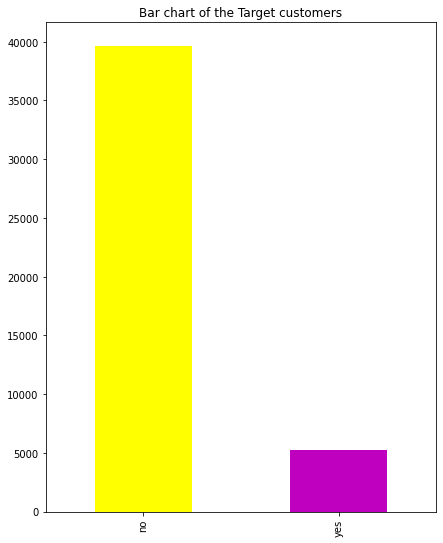

In [29]:
plt.figure(figsize=(7,9))
plt.title('Bar chart of the Target customers')
df['Target'].value_counts().plot(kind='bar',color=['Yellow','m'])
plt.show()

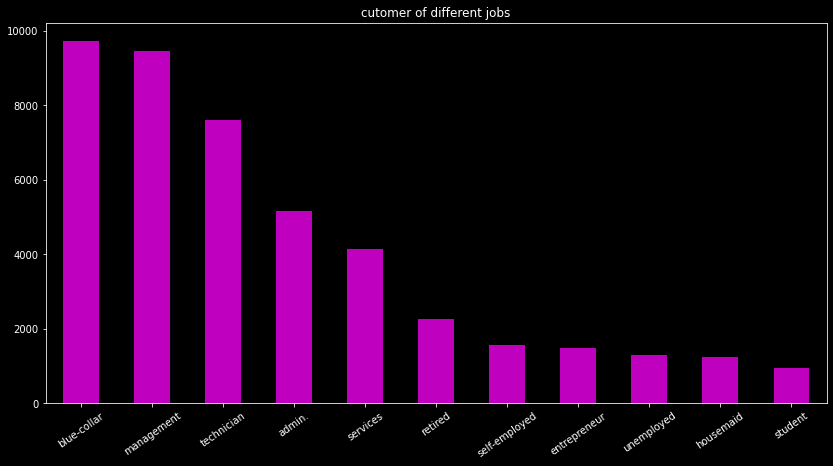

In [30]:
total_job = df['job'].value_counts() #Bar-plot of job categories
plt.style.use('dark_background')
plot = total_job.plot(kind='bar', title = "cutomer of different jobs", figsize=(14,7),color='m')
plt.xticks(fontsize =10,rotation=35)
plt.show()

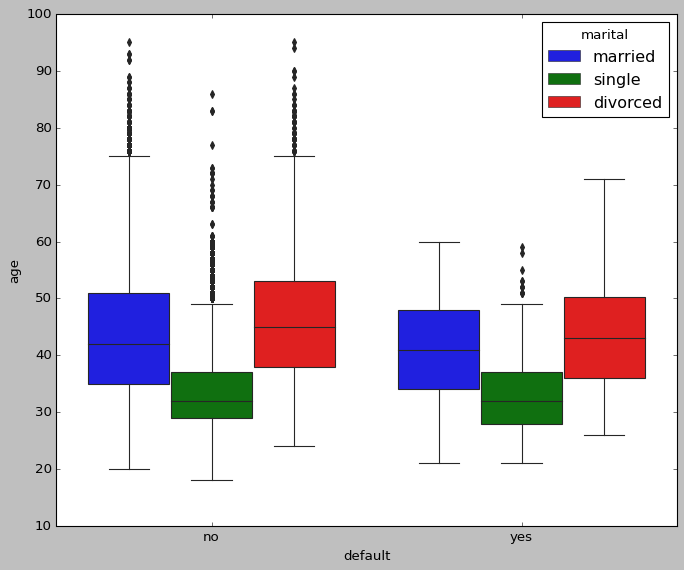

In [55]:
plt.figure(figsize=(10,8)) # Box-plot 
plt.style.use('classic')
sns.boxplot(data=df,x='default',y='age',hue='marital')
plt.show()

# **Model Prepration**

In [31]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,no


In [32]:
df.select_dtypes(exclude='int64')

,job,marital,education,default,housing,loan,Target
0,management,married,tertiary,no,yes,no,no
1,technician,single,secondary,no,yes,no,no
2,entrepreneur,married,secondary,no,yes,yes,no
3,blue-collar,married,unknown,no,yes,no,no
5,management,married,tertiary,no,yes,no,no
...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,yes
45207,retired,divorced,primary,no,no,no,yes
45208,retired,married,secondary,no,no,no,yes
45209,blue-collar,married,secondary,no,no,no,no


In [33]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values # last column values

In [34]:
print(x)

[[58 'management' 'married' ... 1 -1 0]
 [44 'technician' 'single' ... 1 -1 0]
 [33 'entrepreneur' 'married' ... 1 -1 0]
 ...
 [72 'retired' 'married' ... 5 184 3]
 [57 'blue-collar' 'married' ... 4 -1 0]
 [37 'entrepreneur' 'married' ... 2 188 11]]


In [35]:
x[0,]

array([58, 'management', 'married', 'tertiary', 'no', 2143, 'yes', 'no',
       5, 261, 1, -1, 0], dtype=object)

In [36]:
x[0,1]

'management'

In [37]:
print(y)

['no' 'no' 'no' ... 'yes' 'no' 'no']


In [38]:
y

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

 **Encoding Categorical Data**

Label encoding 'Target' column

In [39]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(y)

Label encoding to 'default'	'housing'	'loan' columns

In [40]:
x[:, 4] = le.fit_transform(x[:,4])
x[:, 6] = le.fit_transform(x[:,6])
x[:, 7] = le.fit_transform(x[:,7])


In [41]:
x[0,]

array([58, 'management', 'married', 'tertiary', 0, 2143, 1, 0, 5, 261, 1,
       -1, 0], dtype=object)

One Hot Encoding to column'job'	'marital'	'education'

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [43]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [44]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[12])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [45]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[15])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

# **Splitting the dataset into the Training set and Test set**

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# **Random Forest model**

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
predictions = rfc.predict(x_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7929
           1       0.62      0.31      0.41      1056

    accuracy                           0.90      8985
   macro avg       0.77      0.64      0.68      8985
weighted avg       0.88      0.90      0.88      8985



# **Stratified K-Fold Cross Validation**

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold = StratifiedKFold(n_splits=5)

scores= cross_val_score(rfc,x,y,cv=skfold)
print(scores)
print(np.mean(scores))

[0.88692265 0.87579299 0.87323317 0.849065   0.72918522]
0.8428398052358957
